In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import metrics
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## PCA and SVM Function

In [2]:
def pca_n_svm(x,y, n_pca = 50, kernel = 'poly', PC1 = 0, PC2 = 1):
    
    # standardize data
    x = StandardScaler().fit_transform(x)
    
    # PCA
    pca = PCA(n_components = n_pca)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents)
    PCA_df = pd.concat([principalDf, y], axis = 1)
    
    pca_x = PCA_df.drop('label', axis = 1).values
    pca_y = PCA_df['label'].values
    X_train, X_test, y_train, y_test = train_test_split(pca_x, pca_y, test_size=0.3,random_state=109) # 70% training and 30% test
    
    #Create a svm Classifier
    clf = svm.SVC(kernel=kernel) # Polynomial Kernel
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    
    
    PCA_df["label"].replace({0: "Fake", 1: 'Real'}, inplace=True)
    # Scatter plot of PC0 and PC1
    sns.scatterplot(x=PC1, y=PC2, data=PCA_df,  hue="label")
    #plt.title('PC0 vs PC1')
    # Set x-axis label
    plt.xlabel('PC' + str(PC1))
    # Set y-axis label
    plt.ylabel('PC' + str(PC2))
    



## Custom Model with Augmented Data

In [26]:
# get last layer vector
vector_dense = pd.read_csv('custom_augmented_model_rep.csv')
# shuffle
vector_dense = vector_dense.sample(frac=1).reset_index(drop=True)

In [27]:
x = vector_dense.drop('label', axis = 1).values
y = vector_dense['label']

Accuracy: 0.9103666666666667
Precision: 0.9065628476084538
Recall: 0.9165784599100291


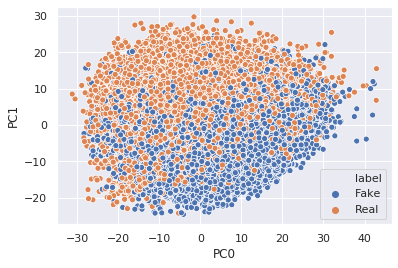

In [28]:
pca_n_svm(x,y)

## VGGFace

In [19]:
# get last layer vector
vector_dense = pd.read_csv('vggface_rep.csv')
# shuffle
vector_dense = vector_dense.sample(frac=1).reset_index(drop=True)

In [20]:
x = vector_dense.drop('label', axis = 1).values
y = vector_dense['label']

Accuracy: 0.9955666666666667
Precision: 0.9957161981258367
Recall: 0.9953830712612914


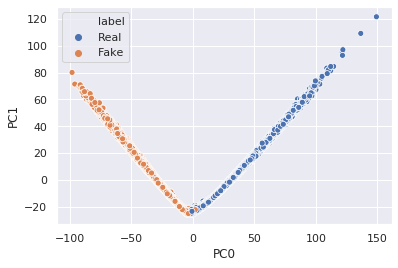

In [21]:
pca_n_svm(x,y)

## DenseNet with Augmented Data

In [9]:
# get last layer vector
vector_dense = pd.read_csv('./vector_reps/augmented_densenet_rep.csv')
# shuffle
vector_dense = vector_dense.sample(frac=1).reset_index(drop=True)

In [10]:
x = vector_dense.drop('label', axis = 1).values
y = vector_dense['label']

Accuracy: 0.8634666666666667
Precision: 0.8618451863250151
Recall: 0.863810098571716


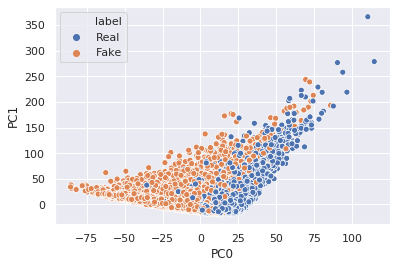

In [11]:
pca_n_svm(x,y)

Accuracy: 0.8638
Precision: 0.8617924213058878
Recall: 0.8646818212297995


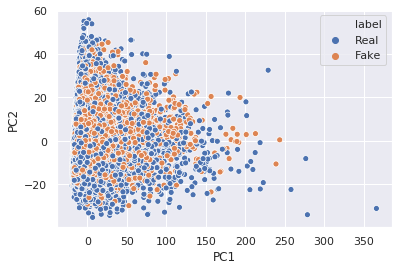

In [12]:
pca_n_svm(x,y, PC1 = 1, PC2 = 2)